# <center><font color='MediumSeaGreen'> _Módulo Machine Learning G45_</font>
# <center><font color='MediumSeaGreen'> Desafío evaluado - Random Forest </font>
## <center> _Algoritmo de ensanmble (Parte 1)_ 
    
### <center><b> Bárbara Pérez </b><center>

______________

## <font color='MediumSeaGreen'>Requerimientos</font>

- Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.


- Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable <span style='background:gainsboro'><font color='dimgray'>Sale_Price</font></span>.


- A diferencia de otras sesiones donde implementamos el preprocesamiento a mano, ahora haremos uso de los archivos serializados en la sesión pasada.

______

## <font color='MediumSeaGreen'>Ejercicio 1: Preparación del ambiente de trabajo</font>

- Importe las librerías clásicas a utilizar.


- Para este ejercicio Random Forest de Regresión.


- De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión.


- Elimine la columna <span style='background:gainsboro'><font color='Maroon'>'Unnamed: 0'</font></span> cuando cargue los datos.

In [1]:
#Importar librerias
import matplotlib.pyplot as plt #version 3.5.2
import pandas as pd  #version 1.4.3
import seaborn as sns  #version 0.11.2
import numpy as np  #version 1.23.0

#Importamos pickle
import pickle

#Librerias para arboles de desición
from sklearn.tree import DecisionTreeRegressor

#Libreria para Random Forest
from sklearn.ensemble import RandomForestRegressor

#librería para pre procesamiento
from sklearn.preprocessing import LabelEncoder

#Libreria para modelamiento
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#Librerias para las métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

#eliminamos los mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importamos las funciones del expositor de curso
import lec8_graphs as afx

In [3]:
#Importamos funciones auxiliares
import funciones_auxiliares as fas

In [4]:
#importamos la base de datos y eliminamos la columna 'Unnamed'
df = pd.read_csv('ames_housing.csv').drop(columns=['Unnamed: 0'])

In [5]:
#revisamos el df
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


__________________

## <font color='MediumSeaGreen'>Ejercicio 2: Importación de archivos serializados</font>

- Importe su modelo entrenado y sus conjuntos de entrenamiento y validación serializados la sesión pasada y evalúe el desempeño del modelo de su compañero con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los causantes.


- No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus métricas.


- Para importar un archivo serializado, puede ocupar la siguiente línea de código:

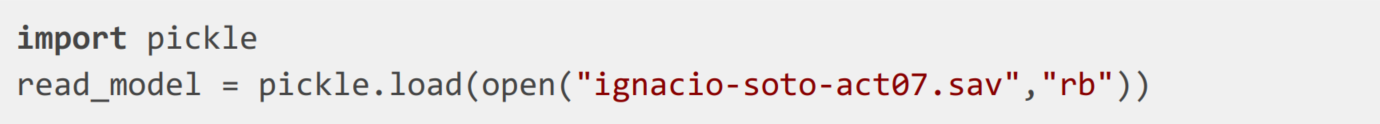

In [6]:
#Importamos el modelo de Gustavo Dawson mediante pickle
modelo_gustavo_dawson= pickle.load(open('gustavo_dawson_desafio_evaluado_arboles_de_regresion.sav','rb'))

In [7]:
#Importamos nuestro modelo y los conjuntos de entrenamiento y validación mediante pickle
modelo_barbara_perez= pickle.load(open('barbara_perez_desafio_evaluado_arboles_de_regresion.sav','rb'))
X_train = pickle.load(open('barbara_perez_desafio_evaluado_arboles_de_regresion_X_train.sav','rb'))
y_train = pickle.load(open('barbara_perez_desafio_evaluado_arboles_de_regresion_y_train.sav','rb'))
X_test = pickle.load(open('barbara_perez_desafio_evaluado_arboles_de_regresion_X_test.sav','rb'))
y_test = pickle.load(open('barbara_perez_desafio_evaluado_arboles_de_regresion_y_test.sav','rb'))

In [8]:
#Reportamos las métricas del modelo de Gustavo en base a mi subset.
fas.metricas(modelo_gustavo_dawson, X_test, y_test)

Test MSE:  2715355963.595
Test MAE:  32192.657
Test R2:  0.568


In [9]:
#Reportamos las métricas del modelo propio en base a mi subset.
fas.metricas(modelo_barbara_perez, X_test, y_test)

Test MSE:  1597636422.156
Test MAE:  23873.655
Test R2:  0.746


Se observa que el modelo de Gustavo tiene unos resultados leve mente más bajos que mis resultados.

In [10]:
#Reentrenamos el modelo de Alexis con mi propio subset de entrenamiento
modelo_gustavo_reentrenado = modelo_gustavo_dawson
modelo_gustavo_reentrenado.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64),
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [11]:
#Reportamos las métricas del modelo de Gustavo reentrenado en base a mi subset.
fas.metricas(modelo_gustavo_reentrenado, X_test, y_test)

Test MSE:  1824762607.211
Test MAE:  27464.998
Test R2:  0.71


Se observa una notable mejora en las métricas del modelo reentrenado de Gustavo.

____________

## <font color='MediumSeaGreen'>Ejercicio 3: Evaluación Random Forest</font>

- En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando <span style='background:gainsboro'><font color='dimgray'>sklearn.ensemble.RandomForest</font></span> sin modificar hiper parámetros, sólo declarando la semilla pseudoaleatoria.


- Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con el de su compañero.

In [12]:
#Creamos y entrenamos un modelo RandomForestRegressor con nuestros datos de entrenamiento y con una semilla
modelo_rfr = RandomForestRegressor(random_state=2401).fit(X_train, y_train)

In [13]:
#Reportamos las métricas del modelo
fas.metricas(modelo_rfr, X_test, y_test)

Test MSE:  904166243.183
Test MAE:  18828.496
Test R2:  0.856


Se observa que las métricas obtenidas del modelo Random Forest Regressor son notablemente mayor a las otras métricas obtenidas anteriormente.

___________

## <font color='MediumSeaGreen'>Ejercicio 4: Reporte las métricas de desempeño</font>

- Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes hiper parámetros:
    - <span style='background:gainsboro'><font color='dimgray'>max_features</font></span>: <span style='background:gainsboro'><font color='dimgray'>**None**</font></span>, <span style='background:gainsboro'><font color='dimgray'>log2</font></span>, <span style='background:gainsboro'><font color='dimgray'>sqrt</font></span>.
    - <span style='background:gainsboro'><font color='dimgray'>n_estimators</font></span>: Evaluar entre 20 y 1000 en pasos de 50.
- Guarde la tasa de error en la exactitud medida con OOB.
- Grafique el comportamiento.

In [14]:
#Creamos un diccionario para guardar los valores
parametros = {
    'max_features': [['None', None], ['Log2','log2'], ['Sqrt','sqrt']],
    'n_estimators' : range(20, 1000, 50)    
}

modelos = tmps = {}

In [15]:
#Creamos el contenido del diccionario con temporales
for p in parametros ['max_features']:
    tmps['tmp_oob_'+p[0]] = []
    tmps['tmp_r2_'+p[0]] = []

tmps

{'tmp_oob_None': [],
 'tmp_r2_None': [],
 'tmp_oob_Log2': [],
 'tmp_r2_Log2': [],
 'tmp_oob_Sqrt': [],
 'tmp_r2_Sqrt': []}

In [16]:
#Iteramos sobre los estimadores y atributos para construir los modelos y sus estimaciones de error

for i in parametros ['n_estimators']:
    for mfs in parametros['max_features']:
        modelos['modelo_temporal_'+mfs[0]] = RandomForestRegressor(n_estimators = i, max_features=mfs[1], oob_score=True, random_state=2401, n_jobs = -1).fit(X_train, y_train)
        
        #Estimamos el error en OOB
        tmps['tmp_oob_'+mfs[0]].append(1- (modelos['modelo_temporal_'+mfs[0]].oob_score_.round(3)))
        
        #Estimamos el MSE
        r2_error= (1- r2_score(y_test, modelos['modelo_temporal_'+mfs[0]].predict(X_test))).round(5)
                                       
        tmps['tmp_r2_'+mfs[0]].append(r2_error)

Al tratarse de un modelo predictivo (No clasificatorio) se utilizó como estimador del error predictivo (R2 error rate)

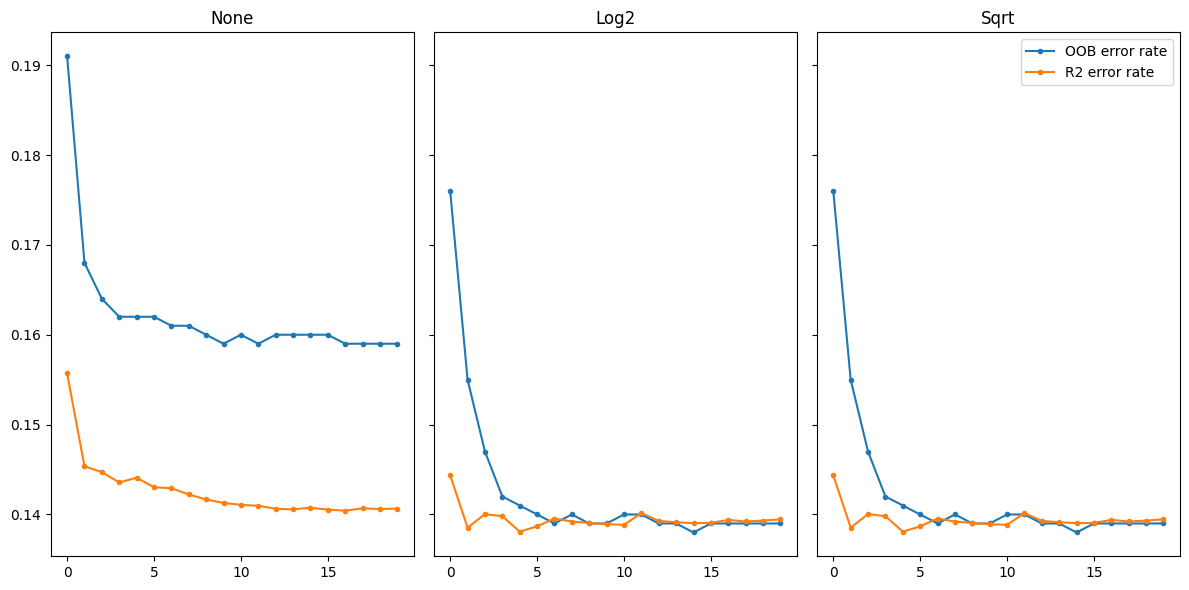

In [17]:
#Graficamos los resultados
plt.rcParams['figure.figsize'] = (12,6)

fig, axs = plt.subplots(1, 3, sharex = True, sharey=True);
for index, mfs in enumerate(parametros['max_features']):
    axs[index].plot(tmps['tmp_oob_'+mfs[0]], '.-', label = 'OOB error rate');
    axs[index].plot(tmps['tmp_r2_'+mfs[0]], '.-', label = 'R2 error rate');
    axs[index].set_title(mfs[0]);
plt.tight_layout();
plt.legend();
plt.show()

In [18]:
#Obtenemos los parámetros asociados al mejor R2 de Log2

for i, j in enumerate (tmps['tmp_r2_Log2']):
    if j == min(tmps['tmp_r2_Log2']):
        mejores_parametros = {
            'max_features': 'log2',
            'n_estimators': parametros['n_estimators'][i]}

print(f"Mejores_parametros: {mejores_parametros}")
print(f"Para un R2 de {1-r2_error}")

Mejores_parametros: {'max_features': 'log2', 'n_estimators': 220}
Para un R2 de 0.86054


_____________

## <font color='MediumSeaGreen'>Ejercicio 5: Refactoriza el modelo</font>

- En base a la mejor combinación de hiper parámetros, reentrene el modelo y comente su desempeño.

_________

In [19]:
#Reentrenamos el modelo en base a los mejores parámetros
modelo_rfr_mejorado = RandomForestRegressor(
    random_state=2401,
    max_features= mejores_parametros['max_features'],
    n_estimators = mejores_parametros['n_estimators']).fit(X_train, y_train)

In [20]:
#Reportamos las métricas del modelo
fas.metricas(modelo_rfr_mejorado, X_test, y_test)

Test MSE:  868553496.34
Test MAE:  18509.112
Test R2:  0.862


___________